## Color detection - piece and background

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

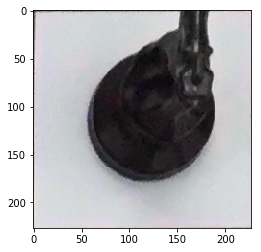

In [7]:
source_image = cv2.imread('H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\output_test\\bn\\0761_6_w.jpg') 
plt.imshow(source_image)

In [3]:
def resize_image(image):
    # resize the image if the dimensions are too large
    height, width = image.shape[:2]
    
    if (height > 300) or (width > 300):
        resized_image = cv2.resize(image, (299, 299), interpolation = cv2.INTER_AREA)
    else:
        resized_image = image
        
    return resized_image

In [4]:
def convert_2_grayscale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

In [9]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)

	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)

	# return the edged image
	return edged

In [6]:
def perform_thresholding(image):
    ret,thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    return thresh

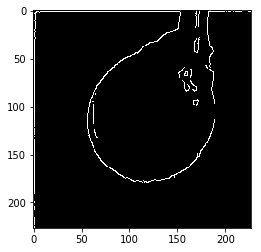

In [12]:
# extract bounding box after edge detection
resized_gray_scale_image = convert_2_grayscale(resize_image(source_image))
image_with_edges = auto_canny(resized_gray_scale_image)
plt.imshow(image_with_edges, cmap='gray')

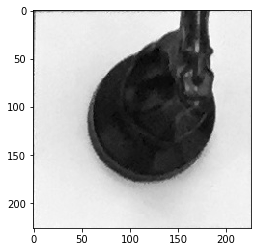

In [13]:
## find the non-zero min-max coords of canny
pts = np.argwhere(image_with_edges>0)
y1,x1 = pts.min(axis=0)
y2,x2 = pts.max(axis=0)

## crop the region
cropped_image = resized_gray_scale_image[y1:y2, x1:x2]
plt.imshow(cropped_image, cmap='gray')